# Ejercicio 1

*Realizaremos un poco de ingeniería inversa sobre el robot Aimu Navira de la
empresa INDAMA (ver figura). El mismo se trata de un robot de 6 ruedas (4 ruedas
de tipo castor -no motoras- y dos ruedas motoras no direccionables). Conociendo
que la posición de las ruedas es simétrica respecto del chasis del robot*

*a) Determine el modelo cinemático del robot.*

El modelo cinemático del robot corresponde al de un robot diferencial con distancia entre ejes cd 46 cm y radio de ruedas (dado en otro ejercicio) de 10 cm.

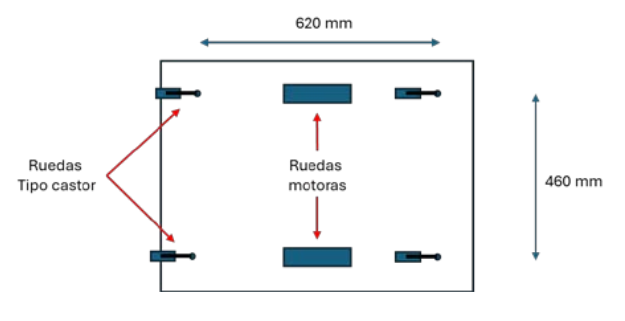

Para este modelo al relación entre las velocidades de las ruedas y la velocidad lineal y angular del robot se puede determiniar trivialemente:

$$
\begin{align*}
v &= \frac{v_r + v_l}{2} \\
\omega &= \frac{v_r - v_l}{2 \cdot l}
\end{align*}
$$

con las velocidades de las ruedas dadas for el radio de las mismas:

$$
\begin{align*}
v_l &= r \phi_l \\
v_r &= r \phi_r \\
\end{align*}
$$

Y para expresarlo en marco mundo:

$$
\begin{align*}
\dot{x}_w &= v \cdot \cos(\theta) \\
\dot{y}_w &= v \cdot \sin(\theta) \\
\dot{\theta}_w &= \omega
\end{align*}
$$

En términos más generales, a partir de las restricciones de rodadura y deslizamiento de las ruedas se puede plantear de forma semejante que:

$$
\begin{bmatrix}
1 & 0 & -l\\
1 & 0 & l\\
0 & 1 & 0\\
\end{bmatrix}

\begin{bmatrix}
\dot{x}_R \\
\dot{y}_R \\
\dot{\theta}_R
\end{bmatrix}
=
\begin{bmatrix}
r \phi_l \\
r \phi_r \\
0
\end{bmatrix}
$$

De donde, despejando y eliminando la tercerca columna del lado derecho:

$$
\begin{bmatrix}
\dot{x}_R \\
\dot{y}_R \\
\dot{\theta}_R
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & -l\\
1 & 0 & l\\
0 & 1 & 0\\
\end{bmatrix}^{-1}

\begin{bmatrix}
r \phi_l \\
r \phi_r \\
0
\end{bmatrix}
= 
\begin{bmatrix}
1/2 & 1/2\\
0 & 0 \\
-1/(2l) & 1/(2l) \\
\end{bmatrix}
\begin{bmatrix}
r \phi_l \\
r \phi_r \\
\end{bmatrix}
$$

Donde la relación con el marco mundo está dada por la matriz de rotación $R(\phi)$

$$
\begin{bmatrix}
\dot{x}_w \\
\dot{y}_w \\
\dot{\theta}_w
\end{bmatrix}

R(\theta)

\begin{bmatrix}
\dot{x}_R \\
\dot{y}_R \\
\dot{\theta}_R
\end{bmatrix}

=

\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0\\
\sin(\theta) & \cos(\theta) & 0\\
0 & 0 & 1\\
\end{bmatrix}

\begin{bmatrix}
\dot{x}_R \\
\dot{y}_R \\
\dot{\theta}_R
\end{bmatrix}
$$


*b) Determine el modelo dinámico del robot.*

El modelo dinámico se puede obtener por el medio de la ecuación de lagrange, planteando primero el lagrangiano del sistema. El robot se mueve en el plano, por lo que no hay energías potenciales, y todas las energías cinéticas están dadas por las velocidades lineales y angulares.

Modelando el vehículo como una masa puntual $M$ en el centro de masa, y un momento de inercia $I$ en el centro de masa, se puede plantear el lagrangiano del sistema como:

$$
L = \frac{1}{2} M (\dot{x}^2 + \dot{y}^2) + \frac{1}{2} I \dot{\theta}^2
$$

Tomando las coordenadas en $x$, $y$ y $\theta$, como coordenadas geneneralizadas, entonces las ecuaciones de lagrange son:

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x}} \right) - \frac{\partial L}{\partial x} = F_x
$$

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{y}} \right) - \frac{\partial L}{\partial y} = F_y
$$

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} = \tau
$$

Que resolviendo se simplifica a:

$$
M \ddot{x} = F_x
$$

$$
M \ddot{y} = F_y
$$

$$
I \ddot{\theta} = \tau
$$

Donde las fuerzas están dadas por la composición de las fuerzas de las ruedas, y el torque por la diferencia de las fuerzas de las ruedas.

$$
F_x = F_{r1} \cos(\theta) + F_{r2} \cos(\theta) = \frac{(\tau_{r1} + \tau_{r2})  \cos(\theta)}{r} \\
$$
$$
F_y = F_{r1} \sin(\theta) + F_{r2} \sin(\theta) = \frac{(\tau_{r1} + \tau_{r2})  \sin(\theta)}{r} \\
$$
$$
\tau = \frac{l}{2} (F_{r1} - F_{r2}) = \frac{l(\tau_{r1} - \tau_{r2})}{2 r}
$$

Entonces el modelo dinámico del robot es:

$$
\begin{bmatrix}
\ddot{x} \\
\ddot{y} \\
\ddot{\theta}
\end{bmatrix}
=
\begin{bmatrix}
\frac{(\tau_{r1} + \tau_{r2})  \cos{\theta}}{M r} \\
\frac{(\tau_{r1} + \tau_{r2})  \sin{\theta}}{M r} \\
\frac{l(\tau_{r1} - \tau_{r2})}{2 I r} \\
\end{bmatrix}
$$

*c) Determine las restricciones cinemáticas del robot y escríbalas en forma
estándar.*

Las restricciones cinématicas para el modelo diferencial son:

$$
0 = \dot{x} \cos(\theta) + \dot{y} \sin(\theta) 
$$

# Ejercicio 2

*Conociendo que el peso del robot junto a una carga máxima es de 300 Kg, y que en
sus especificaciones técnicas se establece que su velocidad máxima es de 2m/s con
pendientes máximas de hasta 4 grados, y el radio de sus ruedas motoras es de 10cm.*

*a) Determine las características de sus motores (potencia, velocidad máxima,
torque mínimo)*

Con una velocidad máxima de 2 m/s, y un radio de rueda de 10 cm, la velocidad angular máxima de las ruedas es:

$$
\omega = \frac{v}{r} = \frac{2}{0.1} = 20 rad/s
$$

Ignorando cualquier roce, con una pendiente de 4 grados, la fuerza necesaria para subir la pendiente a velocidad constante es:

$$
F = m g \sin(\theta) = 300 \cdot 9.8 \cdot \sin(4) = 300 \cdot 9.8 \cdot 0.0698 = 205.29 N
$$

El torque motor necesario para sostener la pendiente es entonces:

$$
\tau = F r = 205.29 \cdot 0.1 = 20.529 Nm
$$

Y la potencia necesaria es:

$$
P = \tau \omega = 20.529 \cdot 20 = 410.58 W    
$$


*Si se utiliza una caja reductora de 10:1 en sus motores como se modifican estos
valores.*

Si se utiliza una caja reductora de 10:1, la velocidad angular del motor es 10 veces mayor, y el torque necesario 10 veces menor.

La potencia necesaria varía en función de la eficiencia de la caja reductora; asumiendo 0.9 de eficiencia, la potencia de motor necesaria es 10/9 veces mayor que la calculada anteriormente.

*c) Conociendo que el equipo cuenta con un banco de baterías de 24V 64Ah, en las
peores condiciones cuanto es la autonomía del equipo (OPCIONAL).*

Expresada en Wh, la capacidad de la batería es:

$$
C = 24 \cdot 64 = 1536 Wh
$$

Por lo que con un consumo permanente de 410.58 W, la autonomía del equipo es:

$$
t = \frac{C}{P} = \frac{1536}{410.58} = 3.74 h
$$

# Ejercicio 3

*3. Proponer un control de posición para este robot considerando el modelo despejado
en 1.a, que información necesita del medio para poder implementarlo.*

El más elemental de los controladores se logra mediante un control simultaneo de la velocidad angular y lineal del robot.

Un lazo "rápido" reduce el error de orientación del robot respecto del objectivo controlando la velocidad angular, mientras que un lazo "lento" reduce el error de posición controlando la velocidad angular en función del error de distancia.

Rápido y lento son términos relativos, y son necesarios para minimizar la probabilidad de oscilación del robot para combinaciones desafortunadas de estado inicial y objetivo.

Para implementar este controlador, se necesita información de la posición y orientación absolutas del robot en el marco de coordenadas del mundo.

# Ejercicio 4

*Para resolver el problema de localización del robot además de los encoders
acoplados a las ruedas motoras, se posee un sistema de balizas distribuidas en la
planta de trabajo. El robot puede localizarse en todo momento conociendo la
distancia a tres de estas balizas.
• Se conoce la posición de la primera baliza TL1 respecto del marco mundo.
• Se conoce la posición de las otras balizas L2 y L3 respecto de L1. (TL1_L2,
TL1_L3).
• El robot conoce la distancia euclidiana desde su posición a cada una de las
balizas r1, r2, r3.
• El robot conoce cuanto se desplazó desde el punto en que fue inicializado,
marco Odom.(TO_R)
• Se conoce que el eje X del marco mundo se encuentra alineado al norte
magnético, y que la IMU del robot devuelve un ángulo θ respecto del norte
magnético.
a) Determine la posición del robot y el marco Odom en el marco mundo. (TR,
TO)
b) De valores convenientes y genere un grafico de la situación.*

A partir de trilateración se puede calcular la posición del robot en el marco mundo, sin información de la orientación. Para ello se determinan las tres distancias a las balizas:

$$
\begin{align*}
d_1 &= \sqrt{(x - x_1)^2 + (y - y_1)^2} \\
d_2 &= \sqrt{(x - x_2)^2 + (y - y_2)^2} \\
d_3 &= \sqrt{(x - x_3)^2 + (y - y_3)^2} \\
\end{align*}
$$

Donde $x_1$, $y_1$, $x_2$, $y_2$, $x_3$, $y_3$ son las posiciones de las balizas en el marco mundo.

Las posiciones (traslaciones puras, ya que no me interesa la orientación) de las balizas 2 y 3 sólo se conocen en relación a la baliza 1, pero su posición se puede calcular por composición de traslaciones:

$$
t^{L2}_{w} = t^{L1}_{w} + t^{L2}_{L1} \\
t^{L3}_{w} = t^{L1}_{w} + t^{L3}_{L1} \\
$$

**La solución del problema de trilateración me da la posición $t^R_w$ del robot en el marco mundo.**

La orientación $\phi_R$ del robot en el marco mundo se puede calcular a partir de la medición de magnetómetro, ya que está alineado con el eje X del marco mundo.

A partir de ambas mediciones se puede determinar la pose (posición + orientación) del robot en el marco mundo, $T^{R}_{w}(\phi_R, t_R)$.

La relación entre el marco odom y el marco mundo se puede determinar a través de su relación por el marco robot. 
Siendo $T^{R}_{O}$ la pose del robot en el marco de odometría, y $T^{O}_{w}$ la pose del marco de odometría en el marco mundo, y $T^{R}_{w}$ la pose del robot en el marco mundo:

$$
T^{O}_{w} \cdot T^{R}_{O} = T^{R}_{w} 
$$

De donde se despeja la relación entre el marco odom y el marco mundo:

$$
T^{O}_{w} = T^{R}_{w} \cdot (T^{R}_{O})^{-1}
$$

# Ejercicio 5



*Al robot anterior se le desea incorporar un brazo robótico de 3 grados de libertad
(No considere movimiento de pinza) como el que se muestra a continuación:*

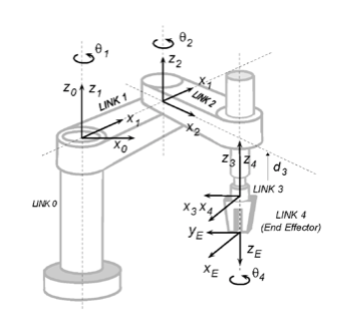

*Este robot se encuentra formado por dos articulaciones rotacionales $\theta_1$, $\theta_2$ y una
prismática $d_3$*

*a) Obtenga la cinemática directa del mismo*

Descartando la articulación de la muñeca $\theta_4$ no mencionada en la consigna, el link 3 está formado por una traslación constante a lo largo de x $l_2$ y un desplazamiento en z $d_3$.

Está dado por la siguiente matriz de transformación homogénea:
$$
T_{3} = 
\begin{bmatrix}
1 & 0 & 0 & l_2 \\
0 & 1 & 0 & 0   \\
0 & 0 & 1 & -d_3 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

El link 2 está formado por una traslación respecto de la columna vertical a lo largo de x $l_1$ y una rotación respecto de z $\theta_2$.

Su transformación homogénea es:

$$
T_{2} =
\begin{bmatrix}
\cos(\theta_2) & -\sin(\theta_2) & 0 & l_1 \\
\sin(\theta_2) & \cos(\theta_2) & 0 & 0  \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

Finalmente el link 1 está formado por un desplazamiento vertical fijo $l_0$ (largo del link 0) y una rotación alrededor de z $\theta_1$.

Su transformación homogénea es:

$$
T_{1} =
\begin{bmatrix}
\cos(\theta_1) & -\sin(\theta_1) & 0 & 0 \\
\sin(\theta_1) & \cos(\theta_1) & 0 & 0  \\
0 & 0 & 1 & l_0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$


La solución cinemática directa, que calcula la posición del link 3 en función de la configuración de las articulaciones
$\theta_1$, $\theta_2$ y $d_3$, se puede calcular por composición:

$$
T_0^3 = T_1 \cdot T_2  \cdot T_3
$$

Expandiendo la expresión:

$$
\begin{align*}
T_0^3 &= T_1 * (T_2 * T_3) \\

T_0^3 &= T_1 *
\begin{bmatrix}
\cos(\theta_2) & -\sin(\theta_2) & 0 & l_1 \\
\sin(\theta_2) & \cos(\theta_2) & 0 & 0  \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 & l_2 \\
0 & 1 & 0 & 0   \\
0 & 0 & 1 & -d_3 \\
0 & 0 & 0 & 1 \\
\end{bmatrix} \\
T_0^3 &= T_1 * 
\begin{bmatrix}
\cos(\theta_2) & -\sin(\theta_2) & 0 & l_2 \cos(\theta_2)  + l_1\\
\sin(\theta_2) & \cos(\theta_2) & 0 & l_2 \sin(\theta_2) \\
0 & 0 & 1 & -d_3 \\
0 & 0 & 0 & 1 \\
\end{bmatrix} \\
T_0^3 &=
\begin{bmatrix}
\cos(\theta_1) & -\sin(\theta_1) & 0 & 0 \\
\sin(\theta_1) & \cos(\theta_1) & 0 & 0  \\
0 & 0 & 1 & l_0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
\cos(\theta_2) & -\sin(\theta_2) & 0 & l_2 \cos(\theta_2)  + l_1\\
\sin(\theta_2) & \cos(\theta_2) & 0 & l_2 \sin(\theta_2) \\
0 & 0 & 1 & -d_3 \\
0 & 0 & 0 & 1 \\
\end{bmatrix} \\
T_0^3 &=
\begin{bmatrix}
\cos(\theta_1) \cos(\theta_2) - \sin(\theta_1) \sin(\theta_2) & -\cos(\theta_1) \sin(\theta_2) - \sin(\theta_1) \cos(\theta_2) & 0 & \cos(\theta_1) (l_2 \cos(\theta_2)  + l_1) - l_2 \sin(\theta_1)\sin(\theta_2) \\
\sin(\theta_1) \cos(\theta_2) + \cos(\theta_1) \sin(\theta_2) & -\sin(\theta_1) \sin(\theta_2) + \cos(\theta_1) \cos(\theta_2) & 0 & \sin(\theta_1) (l_2 \cos(\theta_2)  + l_1) + l_2 \cos(\theta_1)\sin(\theta_2) \\
0 & 0 & 1 & -d_3 + l_0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\end{align*}
$$

Dejando la expresión de $x$, $y$ y $z$ en función de las variables $\theta_1$, $\theta_2$ y $d_3$ (ignorando la orientación):

$$
\begin{align*}
x &= \cos(\theta_1) (l_2 \cos(\theta_2)  + l_1) - l_2 \sin(\theta_1)\sin(\theta_2) \\
y &= \sin(\theta_1) (l_2 \cos(\theta_2)  + l_1) + l_2 \cos(\theta_1)\sin(\theta_2) \\
z &= -d_3 + l_0 \\
\end{align*}
$$

*b. Obtenga el jacobiano de este robot*

El jacobiano de la posición del link 3 respecto de las variables articulares $\theta_1$, $\theta_2$ y $d_3$ se puede obtener derivando la posición respecto de las variables articulares:

$$
J =
\begin{bmatrix}
\frac{\partial x}{\partial \theta_1} & \frac{\partial x}{\partial \theta_2} & \frac{\partial x}{\partial d_3} \\
\frac{\partial y}{\partial \theta_1} & \frac{\partial y}{\partial \theta_2} & \frac{\partial y}{\partial d_3} \\
\frac{\partial z}{\partial \theta_1} & \frac{\partial z}{\partial \theta_2} & \frac{\partial z}{\partial d_3} \\
\end{bmatrix}
$$

Y queda por lo tanto:

$$
J =
\begin{bmatrix}
-\sin(\theta_1) (l_2 \cos(\theta_2) + l_1) - l_2 \cos(\theta_1) \sin(\theta_2)
 & -l_2 \cos(\theta_1) \sin(\theta_2) - l_2 \sin(\theta_1) \cos(\theta_2) 
 & 0 \\
\cos(\theta_1) (l_2 \cos(\theta_2) + l_1) - l_2 \sin(\theta_1) \sin(\theta_2)
    & -l_2 \sin(\theta_1) \sin(\theta_2) + l_2 \cos(\theta_1) \cos(\theta_2)
    & 0 \\
0 & 0 & -1 \\
\end{bmatrix}
$$

El cálculo del determinante para encontrar las singularidades te lo debo; es muy tarde para estar calculando determinantes a mano con cualquier medida de éxito.

Intuitivamente, esperaría que el jacobiano sea singular cuando los links 1 y 2 estén alineados (es decir, con $\theta_2 = 0$ o $\theta_2 = n \pi$), ya que en ese caso la herramienta realiza el mismo movimiento tangencial para variaciones diferenciales de en $\theta_1$ y $\theta_2$ y por lo tanto se pierde la capacidad de controlar la posición en una dirección (la radial). 